# Time Series

### Objectives
#### For datetime module
+ Know the 4 main objects in the standard datetime module - **`date, time, datetime, timedelta`**
+ A **`date`** refers to only month, day, year
+ A **`time`** refer to only hours, minutes, seconds and parts of a second
+ A **`datetime`** refers to a combination of date and time
+ A **`timedelta`** is in units of days, hours
+ Know how to create an instance of each of these 4 classes
+ Milliseconds are $10^{-3}$, microseconds are $10^{-6}$ and nanoseconds are $10^{-9}$
+ The datetime module only has microsecond precision
+ NumPy has nanosecond precision
+ Python epoch is Jan 1, 1970 where time equals 0
+ strftime - (string format time) takes a datetime object and converts it to a string
+ strptime - (string parse time) takes a string and converts it to a datetime object

#### For pandas
+ pd.Timestamp replaces datetime, date, time
+ pd.Timestamp is extremely flexible and intelligent. Can convert many different inputs to timestamps
+ Be aware of the many additional attributes and methods for Timestamp objects
+ Convert a single value to a Timestamp with the **`to_datetime`** function. 
+ Convert an entire Series to Timestamps with **`to_datetime`**
+ Use the **`date_range`** function to create a **`DatetimeIndex`** object of many Timestamps
+ Know how to use offset aliases
+ **`resample`** is the same as groupby but creates independent groups based on periods of time
+ Use aggregate and transform on resample objects
+ **`rolling`** the the same as groupby but creates indpendent groups of the same size.

### Prepare for this lesson by
+ Reading the [datetime documentation](https://docs.python.org/3/library/datetime.html)
+ Read the [time series pandas documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

## Introduction
pandas roots lay in analyzing financial time series data. The author, Wes McKinney was not satisfied with the available tools at the time and decided to build pandas to support his own needs at the hedge fund he was working at. Broadly speaking, time series data is simply points of data gathered over time. Most typically the time is evenly spaced between each data point. pandas has excellent functionality with regards to manipulating dates, aggregating over different time periods, sampling different periods of time and much more.

# Date vs Time vs Datetime
In Python, there is a distinction that needs to be made between date, time and datetime. They all three mean different things and though many functions can use these types of times interchangeably its important to know the difference.
* **date** - Just the Month, Day and Year. So 2016-01-01 would represent January 1, 2016 and be considered a 'date'
* **time** - Just the Hours, minutes, seconds and parts of a second (milli/micro/nano). 5 hours, 45 minutes and 6.74234 seconds for example
* **datetime** - A combination of the above two. Has both date (Year, Month, Day) and time (Hour, Minute, Second) components

# Python's date and time functionality
Before jumping into pandas datetime functionality we will look at an important standard library, the [datetime library](https://docs.python.org/3.5/library/datetime.html) which contains many powerful (but not powerful enough) functions to support date, time and datetime manipulation.

In [1]:
# this is a standard library so it comes shipped with your python installation. no need to conda install
# bring into our namespace
import datetime

## Create a date, a time and a datetime

In [2]:
# date takes three parameters for the year, month and day
my_date = datetime.date(2016, 4, 11)
print("date is ", my_date)

# time takes four parameters: hour, minute, second, microsecond
my_time = datetime.time(10, 54, 32, 34512)
print("time is", my_time)

# datetime takes parameters for all of the above
my_datetime = datetime.datetime(2016, 4, 11, 10, 54, 32, 34512)
print("datetime is", my_datetime)

date is  2016-04-11
time is 10:54:32.034512
datetime is 2016-04-11 10:54:32.034512


In [3]:
# The print function makes the above ouput look pretty. 
# Below we just display the objects in the raw form
my_date, my_time, my_datetime

(datetime.date(2016, 4, 11),
 datetime.time(10, 54, 32, 34512),
 datetime.datetime(2016, 4, 11, 10, 54, 32, 34512))

In [4]:
# What type are these objects?
type(my_date), type(my_time), type(my_datetime)

(datetime.date, datetime.time, datetime.datetime)

In [5]:
# get today's date and datetime
print("Today's date is", datetime.date.today())
print("Today's time is", datetime.datetime.today().time())
print("Today's datetime is", datetime.datetime.today())

Today's date is 2017-03-17
Today's time is 09:20:40.319129
Today's datetime is 2017-03-17 09:20:40.319129


In [6]:
# Get certain properties of date, time, and datetime
my_date.day, my_date.month, my_date.year

(11, 4, 2016)

In [7]:
# What day of the weekday is it? April 11, 2016 was a monday. 
# Monday = 0 Sunday = 6
my_date.weekday()

0

In [8]:
# properties of datetime
my_datetime.year, my_datetime.hour, my_datetime.microsecond

(2016, 10, 34512)

## Converting strings to datetime and datetime to string
There are two functions, **strftime** and **strptime** which are excellent tools for converting strings to datetime and vice-versa
* **strftime** - stands for **string format time** and is really a method acting on a date, datetime or time object and converts that object into a string. It's one argument is the format you want the string to be
* **strptime** - stands for **string parse time** and takes two arguments. The time as a string and the format also a string that tells the function what format the time is in.

[The documentation is going to be very helpful](https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior) here as the formats used in strftime and strptime use something called **directives** to determine the string that matches up with the date and time. 

### `strfttime`
Lets start with strftime and convert date, datetime and time into strings. A directive is preceded immediately by a %. You may insert other characters between each directive

In [9]:
# Convert directly into a string of your choice. Lookup directives online
my_date.strftime("%Y-%m-%d")

'2016-04-11'

In [10]:
# Another more involved directive
my_date.strftime("Remembering back to %A, %B %d, %Y.... What a fantastic day that was.")

'Remembering back to Monday, April 11, 2016.... What a fantastic day that was.'

In [128]:
my_timezone = datetime.timezone(my_date)

TypeError: timezone() argument 1 must be datetime.timedelta, not datetime.date

### `strptime`
This takes a string and a directives and converts it to a python datetime object.

In [11]:
datetime.datetime.strptime("2016-01-05", "%Y-%m-%d")

datetime.datetime(2016, 1, 5, 0, 0)

In [12]:
# an example where month, day, year, minute and hour are smashed together
datestring = "011020160542"
datetime.datetime.strptime(datestring, "%m%d%Y%H%M")

datetime.datetime(2016, 1, 10, 5, 42)

# Date and Datetime addition
It's possible to add an amount of time to a date or datetime object using the timedelta function. timedelta simply produces some amount of time measured in days, seconds and microseconds. You can then use this object to add to date or datetime objects.

**`timedelta`** objects are constructed with the following definition: 

**`timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)`**

In [13]:
# timedelta can take many arguments
# days, seconds, microseconds, milliseconds, minutes, hours, weeks=
my_timedelta = datetime.timedelta(seconds = 5000) 

In [14]:
# add to datetime
my_datetime + my_timedelta

datetime.datetime(2016, 4, 11, 12, 17, 52, 34512)

In [15]:
# original
my_datetime

datetime.datetime(2016, 4, 11, 10, 54, 32, 34512)

In [16]:
# add to date
my_date + my_timedelta

datetime.date(2016, 4, 11)

In [17]:
# original date. Nothing changed since 5000 seconds wasn't long enough to make an extra day
my_date

datetime.date(2016, 4, 11)

In [18]:
# now there is a change
my_date + datetime.timedelta(days = 5)

datetime.date(2016, 4, 16)

In [19]:
# add weeks
a = my_datetime + datetime.timedelta(weeks = 72, days = 4, hours = 44)

In [20]:
# the difference between the underlying string representation and the print function
print(a.__repr__())
print(a)

datetime.datetime(2017, 9, 3, 6, 54, 32, 34512)
2017-09-03 06:54:32.034512


In [21]:
datetime.timedelta(weeks = 72, days = 4, hours = 44)

datetime.timedelta(509, 72000)

### dateutil.relativedelta
An upgrade to the **`timedelta`** class exists with the **`relativedelta`** class from the extension package **`dateutil`**. Check [this stackoverflow](http://stackoverflow.com/questions/12433233/what-is-the-difference-between-datetime-timedelta-and-dateutil-relativedelta) post for more detail.

# Here comes pandas
One of the limitations of the datetime object is that it 'only' gives precision to microseconds (a millionth of a second). Instead of the datetime object, pandas uses numpy's datetime64 and timedelta64 objects which give precision down to the nanosecond (a billionth of a second). These new objects are called **Timestamp** and **Timedelta**.

In [22]:
# import pandas in to begin
import pandas as pd
import numpy as np

### pandas Timestamp replaces datetime's date, time and datetime objects
There are no separate classes of objects for date, time and datetime in pandas. The **`Timestamp`** represents a single moment in time. **`Timedelta`** on the other hand is analagous to **`datetime`**'s **`timedelta`** class and is used for adding and subtracting time from **`Timestamp`** objects.

### Two main ways to create Timestamps
* pd.Timestamp - Turns strings, ints/floats (since epoch) and datetime objects into Timestamps
* pd.to_datetime - Same arguments as **`pd.Timestamp`** but much greater power with arguments for turning strings into Timestamps. Able to convert entire pandas Series into timestamps.

### pd.Timestamp examples
**`pd.Timestamp`** is extremely flexible and intelligent and create timestamps and a wide variety of ways.

In [23]:
pd.Timestamp(year=2012, month=12, day=21, hour=5, minute=10, second=8, microsecond=895123)

Timestamp('2012-12-21 05:10:08.895123')

In [24]:
# create with string
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [25]:
# intelligentlt parses a mix of - and /
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [26]:
# more intelligence
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [27]:
# create a timestamp with nanoseconds
# the 'T' in the middle separates the date from the time

pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

### epoch
Python uses the UNIX epoch of Jan 1, 1970. This is officially second 0. By passing a number to **`pd.Timestamp`**, it will convert it to a proper timestamp. The default **`unit`** for the given number is nanoseconds (ns). You can change it to:
+ microseconds(us)
+ milliseconds(ms)
+ seconds(s)
+ hours(h)
+ days(d)

In [28]:
# number of seconds passed the epoch
pd.Timestamp(100, unit='s')

Timestamp('1970-01-01 00:01:40')

In [29]:
# number of hours
pd.Timestamp(100, unit='h')

Timestamp('1970-01-05 04:00:00')

### Using datetime objects

In [30]:
# can pass in datetime objects to
pd.Timestamp(datetime.datetime(2016, 5, 1, 6))

Timestamp('2016-05-01 06:00:00')

In [31]:
pd.Timestamp(datetime.date(2012, 1, 1))

Timestamp('2012-01-01 00:00:00')

### Timestamp attributes
There are a few more additional attributes that pandas **`Timestamp`** objects have compared to their **`datetime`** counterparts.

In [32]:
# create a timestamp and get some of its attributes
my_timestamp = pd.Timestamp('Jan 3, 2019 20:45.56')

In [33]:
# a few of the attributes
(
    my_timestamp.day,
    my_timestamp.dayofweek,
    my_timestamp.days_in_month,
    my_timestamp.is_month_start,
    my_timestamp.minute
)

(3, 3, 31, False, 45)

### Using `pd.to_datetime` to create a single Timestamp
pd.to_datetime is a relatively new function to pandas and has even more functionality for converting objects to Timestamps. It can also convert entire Series of data to timestamps but the following examples will only convert scalar values.

In [34]:
# Switch month and year. to_datetime has addtional functionality. Check arguments for more
pd.to_datetime('05-01-2016', dayfirst=True)

Timestamp('2016-01-05 00:00:00')

In [35]:
# use same directives as datetime objects for more complex arrangements of dates
pd.to_datetime("01-a2016-bbb05", format="%m-a%Y-bbb%d")

Timestamp('2016-01-05 00:00:00')

### Going back to datetime
Timestamp objects have a couple methods to convert back to a datetime object or a numpy datetime64 object which forms the base for pandas Timestamp object.

In [36]:
# convert to datetime. Nanoseconds get chopped off
my_timestamp.to_pydatetime()

datetime.datetime(2019, 1, 3, 20, 45, 33)

In [37]:
# its already datetime64 but to explicity make it a numpy object
my_timestamp.to_datetime64()

numpy.datetime64('2019-01-03T20:45:33.000000000')

In [38]:
# check timestamp type
type(my_timestamp)

pandas.tslib.Timestamp

## Timestamp addition/subtraction with Timedelta64
The Timedelta64 object works similary to timedelta from the datetime library.

In [39]:
my_timedelta64 = pd.Timedelta(weeks = 5, days = 10, nanoseconds = 190)
my_timedelta64

Timedelta('45 days 00:00:00.000000')

In [40]:
# add the time delta
my_timestamp + my_timedelta64

Timestamp('2019-02-17 20:45:33.000000190')

In [41]:
# subtract a multiple of the time delta
my_timestamp - 100 * my_timedelta64

Timestamp('2006-09-08 20:45:32.999981')

## Creating date ranges with pd.date_range
Creating single dates is usually not what you will be doing in pandas. The **date_range** function gives you the ability to create very precise and varied ranges of Timestamps. The **`date_range`** function formally creates a **`DatetimeIndex`** object (and not a list or a range) which is naturally meant to be stored as a pandas index in a Series or DataFrame. You can also assign to a column of a DataFrame and similarly as the values of a Series. The data type will be **`datetime64`**.

A couple common ways of making a range of dates are outlined below
* Supply the start and end dates along with a frequency
* Supply exactly one of start or end date and then give the number of periods and frequency

Start and end dates can be strings or datetime/Timestamp objects

In [42]:
# give start and end dates and generate each day
# notice that the type of each object is datetime64 and there arer 152 days and the frequency is days
# Also notice the type of the whole range is of DatetimeIndex and not a list. pandas does some extra work to
# make the DatetimeIndex faster and more powerful than a list
pd.date_range(start="2016-01-01", end="2016-05-31", freq='D')

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-05-22', '2016-05-23', '2016-05-24', '2016-05-25',
               '2016-05-26', '2016-05-27', '2016-05-28', '2016-05-29',
               '2016-05-30', '2016-05-31'],
              dtype='datetime64[ns]', length=152, freq='D')

In [43]:
# Do the same range except only do business days
pd.date_range(start="2016-01-01", end="2016-05-31", freq='B')

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2016-05-18', '2016-05-19', '2016-05-20', '2016-05-23',
               '2016-05-24', '2016-05-25', '2016-05-26', '2016-05-27',
               '2016-05-30', '2016-05-31'],
              dtype='datetime64[ns]', length=108, freq='B')

## Where are these frequencies coming from?
Those frequencies are called [offset aliases](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) and determine at what intervals the date range will output. The table below shows all the possible offsets and their aliases (what you will use).

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-even"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-odd"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [44]:
# Do the same thing except for business end of month
# only 5 months here
pd.date_range(start="2016-01-01", end="2016-05-31", freq='BM')

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [130]:
pd.date_range(start="2016-01-01", end="2016-05-31", freq='5W-WED')  #all dates are wednesdays, go for five weeks, "anchored offset"

DatetimeIndex(['2016-01-06', '2016-02-10', '2016-03-16', '2016-04-20',
               '2016-05-25'],
              dtype='datetime64[ns]', freq='5W-WED')

In [45]:
# use the periods argument to specify how many dates you want.
# Specify only one of either start or end date
pd.date_range(start="2016-01-10", periods=10, freq='W')

DatetimeIndex(['2016-01-10', '2016-01-17', '2016-01-24', '2016-01-31',
               '2016-02-07', '2016-02-14', '2016-02-21', '2016-02-28',
               '2016-03-06', '2016-03-13'],
              dtype='datetime64[ns]', freq='W-SUN')

## An actual time series
So far we have been playing around with standard Python and pandas date functionality without any data attached to the dates. We will now begin to explore slicing a Series of time series data.

In [131]:
# get a year and a half of business day data
idx = pd.date_range(start='2014-01-01', end='2015-06-30', freq='B') #B is business days
s = pd.Series(data=np.random.rand(len(idx)), index=idx)

In [132]:
s.head(15)

2014-01-01    0.924684
2014-01-02    0.658706
2014-01-03    0.578052
2014-01-06    0.679835
2014-01-07    0.035350
2014-01-08    0.514609
2014-01-09    0.489039
2014-01-10    0.523587
2014-01-13    0.373466
2014-01-14    0.672690
2014-01-15    0.856123
2014-01-16    0.082237
2014-01-17    0.455906
2014-01-20    0.941498
2014-01-21    0.265372
Freq: B, dtype: float64

## Intelligent slicing with [ ]
We have a series of random data with a DatetimeIndex. It was stressed that using the brackets [] with series is not good practice but when you have a DatetimeIndex we can relax this as the index is not going to be ambiguous.

In [48]:
# Get a single date with []
s['2014-01-17']

0.92749176106919617

In [49]:
# Get a range of dates by using slice notation
# since january 18th is not in the series it simply doesn't return a value for it
s['2014-01-18':'2014-02-5']

2014-01-20    0.036597
2014-01-21    0.768213
2014-01-22    0.097266
2014-01-23    0.227016
2014-01-24    0.293888
2014-01-27    0.251900
2014-01-28    0.445646
2014-01-29    0.031862
2014-01-30    0.305452
2014-01-31    0.392871
2014-02-03    0.959165
2014-02-04    0.049955
2014-02-05    0.799157
Freq: B, dtype: float64

In [50]:
# get an entire month
s['2015-02']

2015-02-02    0.640812
2015-02-03    0.494334
2015-02-04    0.268162
2015-02-05    0.911440
2015-02-06    0.306842
2015-02-09    0.690014
2015-02-10    0.817288
2015-02-11    0.137627
2015-02-12    0.542062
2015-02-13    0.891472
2015-02-16    0.402934
2015-02-17    0.749885
2015-02-18    0.065545
2015-02-19    0.112574
2015-02-20    0.758200
2015-02-23    0.455357
2015-02-24    0.142524
2015-02-25    0.653033
2015-02-26    0.461854
2015-02-27    0.437054
Freq: B, dtype: float64

In [51]:
# get an entire year
s['2014'].tail(10)

2014-12-18    0.188835
2014-12-19    0.146477
2014-12-22    0.058646
2014-12-23    0.452481
2014-12-24    0.253815
2014-12-25    0.468950
2014-12-26    0.646987
2014-12-29    0.953018
2014-12-30    0.853961
2014-12-31    0.040594
Freq: B, dtype: float64

In [52]:
# .loc will do the same thing
s.loc['2014-01-18':'2014-02-5']

2014-01-20    0.036597
2014-01-21    0.768213
2014-01-22    0.097266
2014-01-23    0.227016
2014-01-24    0.293888
2014-01-27    0.251900
2014-01-28    0.445646
2014-01-29    0.031862
2014-01-30    0.305452
2014-01-31    0.392871
2014-02-03    0.959165
2014-02-04    0.049955
2014-02-05    0.799157
Freq: B, dtype: float64

## Shifting a Series up or down
The **shift** and **tshift** methods can shift a Series up or down. **`shift`** moves the **values** of the Series up or down the exact number that it was passed. **`tshift`**  shifts the **index** of the Series up or down based on the **frequency** of the **DatetimeIndex** object. 

In [53]:
# original series
s.head(10)

2014-01-01    0.878435
2014-01-02    0.955676
2014-01-03    0.360992
2014-01-06    0.114185
2014-01-07    0.631229
2014-01-08    0.619441
2014-01-09    0.384373
2014-01-10    0.702924
2014-01-13    0.574975
2014-01-14    0.666973
Freq: B, dtype: float64

In [54]:
# use shift to shift the values up 5 days
# the index stays the same and missing values appear where there is no previous data
s.shift(5).head(10)

2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08    0.878435
2014-01-09    0.955676
2014-01-10    0.360992
2014-01-13    0.114185
2014-01-14    0.631229
Freq: B, dtype: float64

In [55]:
# down shift 3 days
# by looking at the tail we see that the last three values are missing
s.shift(-3).tail(10)

2015-06-17    0.690160
2015-06-18    0.583555
2015-06-19    0.252383
2015-06-22    0.727220
2015-06-23    0.027900
2015-06-24    0.127065
2015-06-25    0.985698
2015-06-26         NaN
2015-06-29         NaN
2015-06-30         NaN
Freq: B, dtype: float64

In [133]:
s.shift(-3).head(10) # when you shift, you shift data out (lose it)  shift works for any series or index

2014-01-01    0.679835
2014-01-02    0.035350
2014-01-03    0.514609
2014-01-06    0.489039
2014-01-07    0.523587
2014-01-08    0.373466
2014-01-09    0.672690
2014-01-10    0.856123
2014-01-13    0.082237
2014-01-14    0.455906
Freq: B, dtype: float64

### `tshift`
Be careful, **`tshift`** moves by frequency.

In [56]:
# This will shift 3 BUSINESS days or whatever the original frequency was. 
# notice how only the index was changed
s.tshift(3).head()

2014-01-06    0.878435
2014-01-07    0.955676
2014-01-08    0.360992
2014-01-09    0.114185
2014-01-10    0.631229
Freq: B, dtype: float64

In [57]:
# Shift three normal days
# notice how the index is different than the series ouput above
s.tshift(3, freq='D').head()

2014-01-04    0.878435
2014-01-05    0.955676
2014-01-06    0.360992
2014-01-09    0.114185
2014-01-10    0.631229
Freq: B, dtype: float64

## Sampling a particular frequency of your time series data
Occasionally during a time series analysis you would want to grab a small, regular repeating fraction of your data. Every friday, or every other tuesday or every end of business quarter. The **asfreq** method allows for this flexibility and coupled with **anchored offsets** provides some nifty time slices can be grabbed.

In [58]:
# keep using the same time series from above and grab the end of each business month
# note how pandas automatically picks the last business day and not last day of each month for you
# this is called "down sampling"  BM = "Business Month End".  BS = "Business Start Month"
# Upsampling is to select from original data more frequently 
s.asfreq(freq='BM')

2014-01-31    0.392871
2014-02-28    0.031827
2014-03-31    0.880056
2014-04-30    0.283933
2014-05-30    0.642194
2014-06-30    0.127116
2014-07-31    0.889257
2014-08-29    0.753736
2014-09-30    0.018655
2014-10-31    0.818122
2014-11-28    0.926780
2014-12-31    0.040594
2015-01-30    0.208749
2015-02-27    0.437054
2015-03-31    0.833645
2015-04-30    0.381400
2015-05-29    0.169390
2015-06-30    0.985698
Freq: BM, dtype: float64

### Using Anchored offsets
[An anchored offset](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#anchored-offsets) allows for a particular frequency to be anchored to a specific day/month. It is most commonly used with frequencies in weeks to determine the start or end of that week

In [59]:
# get one data per week
# But which one does pandas default to?
# Look closely at the bottom. Freq: W-SUN means it gets the value of the series for each sunday in the week
# Since this data has only business days, they will all return as NaN for Sunday
s.asfreq("W").head(10)

2014-01-05   NaN
2014-01-12   NaN
2014-01-19   NaN
2014-01-26   NaN
2014-02-02   NaN
2014-02-09   NaN
2014-02-16   NaN
2014-02-23   NaN
2014-03-02   NaN
2014-03-09   NaN
Freq: W-SUN, dtype: float64

In [60]:
# lets fix this by getting the value of friday for each week
s.asfreq('W-FRI').head(10)

2014-01-03    0.360992
2014-01-10    0.702924
2014-01-17    0.927492
2014-01-24    0.293888
2014-01-31    0.392871
2014-02-07    0.896021
2014-02-14    0.516043
2014-02-21    0.604347
2014-02-28    0.031827
2014-03-07    0.388849
Freq: W-FRI, dtype: float64

In [61]:
# How about every third Wednesday?
# pretty amazing
s.asfreq('3W-WED')

2014-01-01    0.878435
2014-01-22    0.097266
2014-02-12    0.064294
2014-03-05    0.511359
2014-03-26    0.088786
2014-04-16    0.832184
2014-05-07    0.164137
2014-05-28    0.609976
2014-06-18    0.464429
2014-07-09    0.865308
2014-07-30    0.068209
2014-08-20    0.122413
2014-09-10    0.366117
2014-10-01    0.683190
2014-10-22    0.471621
2014-11-12    0.273339
2014-12-03    0.157574
2014-12-24    0.253815
2015-01-14    0.954778
2015-02-04    0.268162
2015-02-25    0.653033
2015-03-18    0.975272
2015-04-08    0.104166
2015-04-29    0.981014
2015-05-20    0.789527
2015-06-10    0.321127
Freq: 3W-WED, dtype: float64

In [62]:
# How about every 5 hours?
# most of these dates don't correspond with data
s.asfreq('5H').head(15)

2014-01-01 00:00:00    0.878435
2014-01-01 05:00:00         NaN
2014-01-01 10:00:00         NaN
2014-01-01 15:00:00         NaN
2014-01-01 20:00:00         NaN
2014-01-02 01:00:00         NaN
2014-01-02 06:00:00         NaN
2014-01-02 11:00:00         NaN
2014-01-02 16:00:00         NaN
2014-01-02 21:00:00         NaN
2014-01-03 02:00:00         NaN
2014-01-03 07:00:00         NaN
2014-01-03 12:00:00         NaN
2014-01-03 17:00:00         NaN
2014-01-03 22:00:00         NaN
Freq: 5H, dtype: float64

# 'Resampling' - grouping data over certain time frequencies
Resampling is a very confusing word. It is used exactly like the **`groupby`** method to perform a calculation on certain independent subsets of data. The groups for **`resample`** are simply chunks of time instead of unique combinations of column values.

### Aggregating
Many times, it will be necessary to aggregate time series data over a certain regular interval of time. Aggregating meaning that a function will be applied to an interval of a time series to produce a single number. Summing the total values over a month, or finding the mean of every 2 week period, or finding the max value over each year, etc... pandas uses the confusing (in my opinion) term 'resampling' to denote this aggregation over a time period.

In [135]:
s.head(10)

2014-01-01    0.924684
2014-01-02    0.658706
2014-01-03    0.578052
2014-01-06    0.679835
2014-01-07    0.035350
2014-01-08    0.514609
2014-01-09    0.489039
2014-01-10    0.523587
2014-01-13    0.373466
2014-01-14    0.672690
Freq: B, dtype: float64

In [136]:
# get the max value each week
s.resample('W').max().head()

2014-01-05    0.924684
2014-01-12    0.679835
2014-01-19    0.856123
2014-01-26    0.941498
2014-02-02    0.717879
Freq: W-SUN, dtype: float64

In [64]:
# can explicity use agg method
s.resample('W').agg(np.max).head()

2014-01-05    0.955676
2014-01-12    0.702924
2014-01-19    0.927492
2014-01-26    0.768213
2014-02-02    0.445646
Freq: W-SUN, dtype: float64

In [65]:
# get the mean each month
s.resample('M').mean()

2014-01-31    0.458069
2014-02-28    0.539552
2014-03-31    0.493618
2014-04-30    0.419645
2014-05-31    0.550129
2014-06-30    0.573762
2014-07-31    0.489686
2014-08-31    0.532744
2014-09-30    0.386748
2014-10-31    0.469604
2014-11-30    0.532239
2014-12-31    0.436556
2015-01-31    0.502209
2015-02-28    0.496951
2015-03-31    0.524905
2015-04-30    0.608929
2015-05-31    0.462219
2015-06-30    0.476363
Freq: M, dtype: float64

In [66]:
# Get the mean each business month 
s.resample('BM').mean()

2014-01-31    0.458069
2014-02-28    0.539552
2014-03-31    0.493618
2014-04-30    0.419645
2014-05-30    0.550129
2014-06-30    0.573762
2014-07-31    0.489686
2014-08-29    0.532744
2014-09-30    0.386748
2014-10-31    0.469604
2014-11-28    0.532239
2014-12-31    0.436556
2015-01-30    0.502209
2015-02-27    0.496951
2015-03-31    0.524905
2015-04-30    0.608929
2015-05-29    0.462219
2015-06-30    0.476363
Freq: BM, dtype: float64

In [67]:
# the last two examples give the same exact values
(s.resample('BM').mean().values == s.resample('M').mean().values).all()

True

In [68]:
# get max over a year
s.resample('A').max()

2014-12-31    0.998519
2015-12-31    0.989190
Freq: A-DEC, dtype: float64

In [137]:
# use many aggregate functions
s.resample('10D').agg(['max', 'min', 'mean', 'std']).head()

,max,min,mean,std
2014-01-01,0.924684,0.035350,0.550483,0.250821
2014-01-11,0.941498,0.082237,0.563653,0.322409
2014-01-21,0.717879,0.029485,0.475767,0.251193
2014-01-31,0.841956,0.001252,0.377445,0.346338
2014-02-10,0.793398,0.295194,0.465859,0.205367


### Upsampling
'Upsampling' refers to choosing intervals of time for the **`resample`** that is less than the frequency of the index. For instance, resampling every 6 hours for a DatetimeIndex with a 1 day frequency. 

We can fill in the missing values in a number of different ways.

In [70]:
# sample every 6 hours
# first save a sa resmaple object

r = s.resample('6H')

### as_freq after resample
The **`as_freq`** method of a **`Resampler`** object (the formal name for the object assigned to **`s.resample('6H')`** simply displays the raw data.

In [71]:
# view the raw resample before aggregation
# lots of missing values as only time 00:00:00 will have any values

r.asfreq().head(15)

2014-01-01 00:00:00    0.878435
2014-01-01 06:00:00         NaN
2014-01-01 12:00:00         NaN
2014-01-01 18:00:00         NaN
2014-01-02 00:00:00    0.955676
2014-01-02 06:00:00         NaN
2014-01-02 12:00:00         NaN
2014-01-02 18:00:00         NaN
2014-01-03 00:00:00    0.360992
2014-01-03 06:00:00         NaN
2014-01-03 12:00:00         NaN
2014-01-03 18:00:00         NaN
2014-01-04 00:00:00         NaN
2014-01-04 06:00:00         NaN
2014-01-04 12:00:00         NaN
Freq: 6H, dtype: float64

In [138]:
NaN == NaN

NameError: name 'NaN' is not defined

### Fill in missing values with interpolate and ffill/bfill

In [72]:
# linearly interpolate values from one known value to the next
r.interpolate().head(15)

2014-01-01 00:00:00    0.878435
2014-01-01 06:00:00    0.897745
2014-01-01 12:00:00    0.917055
2014-01-01 18:00:00    0.936366
2014-01-02 00:00:00    0.955676
2014-01-02 06:00:00    0.807005
2014-01-02 12:00:00    0.658334
2014-01-02 18:00:00    0.509663
2014-01-03 00:00:00    0.360992
2014-01-03 06:00:00    0.340425
2014-01-03 12:00:00    0.319858
2014-01-03 18:00:00    0.299290
2014-01-04 00:00:00    0.278723
2014-01-04 06:00:00    0.258156
2014-01-04 12:00:00    0.237589
Freq: 6H, dtype: float64

In [73]:
r.ffill().head(15)

2014-01-01 00:00:00    0.878435
2014-01-01 06:00:00    0.878435
2014-01-01 12:00:00    0.878435
2014-01-01 18:00:00    0.878435
2014-01-02 00:00:00    0.955676
2014-01-02 06:00:00    0.955676
2014-01-02 12:00:00    0.955676
2014-01-02 18:00:00    0.955676
2014-01-03 00:00:00    0.360992
2014-01-03 06:00:00    0.360992
2014-01-03 12:00:00    0.360992
2014-01-03 18:00:00    0.360992
2014-01-04 00:00:00    0.360992
2014-01-04 06:00:00    0.360992
2014-01-04 12:00:00    0.360992
Freq: 6H, dtype: float64

In [74]:
r.bfill().head(15)

2014-01-01 00:00:00    0.878435
2014-01-01 06:00:00    0.955676
2014-01-01 12:00:00    0.955676
2014-01-01 18:00:00    0.955676
2014-01-02 00:00:00    0.955676
2014-01-02 06:00:00    0.360992
2014-01-02 12:00:00    0.360992
2014-01-02 18:00:00    0.360992
2014-01-03 00:00:00    0.360992
2014-01-03 06:00:00    0.114185
2014-01-03 12:00:00    0.114185
2014-01-03 18:00:00    0.114185
2014-01-04 00:00:00    0.114185
2014-01-04 06:00:00    0.114185
2014-01-04 12:00:00    0.114185
Freq: 6H, dtype: float64

In [148]:
# fill in NA with cumulative sum
s6 = s.asfreq('6H')
s6_cumsum = s6.fillna(0).cumsum()
s6_cumcount = s6.notnull().cumsum()
s6_cumsum / s6_cumcount
s6.fillna(s6_cumsum / s6_cumcount)

2014-01-01 00:00:00    0.924684
2014-01-01 06:00:00    0.924684
2014-01-01 12:00:00    0.924684
2014-01-01 18:00:00    0.924684
2014-01-02 00:00:00    0.658706
2014-01-02 06:00:00    0.791695
2014-01-02 12:00:00    0.791695
2014-01-02 18:00:00    0.791695
2014-01-03 00:00:00    0.578052
2014-01-03 06:00:00    0.720481
2014-01-03 12:00:00    0.720481
2014-01-03 18:00:00    0.720481
2014-01-04 00:00:00    0.720481
2014-01-04 06:00:00    0.720481
2014-01-04 12:00:00    0.720481
2014-01-04 18:00:00    0.720481
2014-01-05 00:00:00    0.720481
2014-01-05 06:00:00    0.720481
2014-01-05 12:00:00    0.720481
2014-01-05 18:00:00    0.720481
2014-01-06 00:00:00    0.679835
2014-01-06 06:00:00    0.710319
2014-01-06 12:00:00    0.710319
2014-01-06 18:00:00    0.710319
2014-01-07 00:00:00    0.035350
2014-01-07 06:00:00    0.575325
2014-01-07 12:00:00    0.575325
2014-01-07 18:00:00    0.575325
2014-01-08 00:00:00    0.514609
2014-01-08 06:00:00    0.565206
                         ...   
2015-06-

In [177]:
# days between 5 and 13
s[(s.index.day > 5) & (s.index.day < 13)].head(20)


2014-01-06    0.679835
2014-01-07    0.035350
2014-01-08    0.514609
2014-01-09    0.489039
2014-01-10    0.523587
2014-02-06    0.102956
2014-02-07    0.603182
2014-02-10    0.351908
2014-02-11    0.768913
2014-02-12    0.500394
2014-03-06    0.562658
2014-03-07    0.632821
2014-03-10    0.605649
2014-03-11    0.536574
2014-03-12    0.922099
2014-04-07    0.893153
2014-04-08    0.819145
2014-04-09    0.133634
2014-04-10    0.986431
2014-04-11    0.737425
dtype: float64

In [75]:
# Aggregate by every 3rd week and use the 'agg' method to find many different aggregates
s.resample('3W').agg(['mean', 'max', 'std', lambda x: x.max() - x.min()]).head(15)

,mean,max,std,<lambda>
2014-01-05,0.731701,0.955676,0.323358,0.594684
2014-01-26,0.460850,0.927492,0.275075,0.890894
2014-02-16,0.448357,0.959165,0.312510,0.927303
2014-03-09,0.497595,0.966873,0.247721,0.935046
2014-03-30,0.501028,0.959431,0.341320,0.906105
2014-04-20,0.441310,0.880056,0.298919,0.825833
2014-05-11,0.518122,0.945492,0.330718,0.928736
2014-06-01,0.521573,0.998519,0.329925,0.968128
2014-06-22,0.610583,0.995014,0.310752,0.958005
2014-07-13,0.548708,0.893295,0.266583,0.766179


### `transform` with resample objects

In [76]:
# normalize every month of data
s.resample('M').transform(lambda x: (x - x.mean())/x.std()).head(15)

2014-01-01    1.492574
2014-01-02    1.766832
2014-01-03   -0.344687
2014-01-06   -1.221014
2014-01-07    0.614831
2014-01-08    0.572976
2014-01-09   -0.261671
2014-01-10    0.869397
2014-01-13    0.415092
2014-01-14    0.741745
2014-01-15    0.512233
2014-01-16   -0.682503
2014-01-17    1.666759
2014-01-20   -1.496502
2014-01-21    1.101216
Freq: B, dtype: float64

# Rolling Window Calculations
Often in time series analysis a continuous rolling window of time will be desired. This is similar to resampling except that each time period has its own window and so the same number of time periods will be returned when a calculation is performed on that window of data.

### Get real stock market data
We will use **pandas_datareader** to grab some stock market data.

In [77]:
from pandas_datareader.data import DataReader

In [78]:
# general form for DataReader
# get apple stock from 2012 til present
aapl = DataReader('AAPL', data_source='google', start='2012-01-01')
aapl.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,58.49,58.93,58.43,58.75,75564699
2012-01-04,58.57,59.24,58.47,59.06,65061108
2012-01-05,59.28,59.79,58.95,59.72,67816805
2012-01-06,59.97,60.39,59.89,60.34,79596412
2012-01-09,60.79,61.11,60.19,60.25,98505792
2012-01-10,60.84,60.86,60.21,60.46,64581762
2012-01-11,60.38,60.41,59.90,60.36,53798059
2012-01-12,60.33,60.41,59.82,60.20,53180911
2012-01-13,59.96,60.06,59.81,59.97,56539749


In [79]:
# two tech stocks and two oil stocks
stocks = ['AAPL', 'GOOG', 'HOS', 'SLB']


# Grab 4.5 years of stock closing price data from google finance
stock_data = {stock: DataReader(stock, data_source='google', start='2012-01-01')['Close'] for stock in stocks}
df = pd.DataFrame(stock_data, columns=stocks)
df.head(10)

,AAPL,GOOG,HOS,SLB
Date,,,,
2012-01-03,58.75,332.37,31.46,70.09
2012-01-04,59.06,333.81,31.76,69.56
2012-01-05,59.72,329.18,32.21,68.07
2012-01-06,60.34,324.68,33.80,67.78
2012-01-09,60.25,310.92,32.78,68.82
2012-01-10,60.46,311.26,33.59,70.75
2012-01-11,60.36,312.67,33.29,70.16
2012-01-12,60.20,314.51,32.98,69.70
2012-01-13,59.97,312.18,33.53,67.99


In [80]:
# Lets plot this
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
plt.style.use("ggplot")

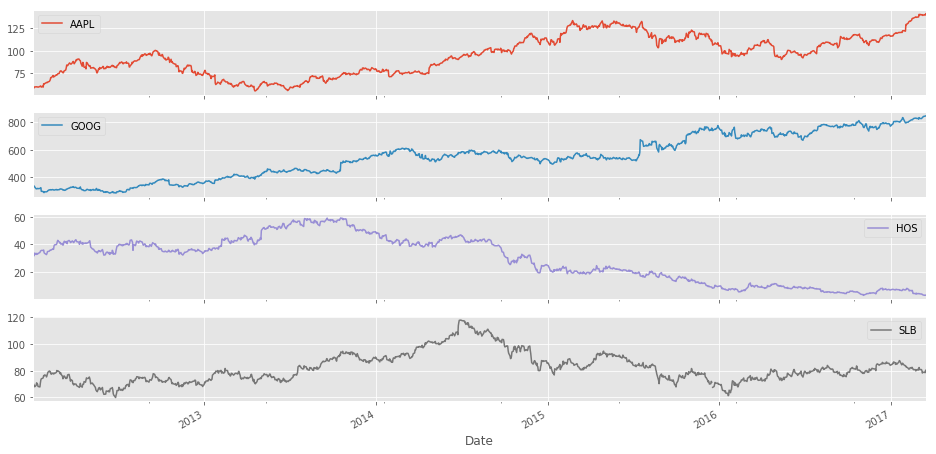

In [82]:
ax = df.plot(subplots=True, figsize=(16,8));

### Create a rolling object
**rolling** is both a Series and DataFrame method thats main input is the number of time periods to look back at each date before performing the calculation.

In [83]:
# Initialize rolling object by looking back at the last 10 obsrevations
r = df.rolling(10)

In [84]:
# Find the rolling mean of the last 10 observations
# The first 9 observations are missing since there wasn't 10 historical points yet
r.mean().head(15)

,AAPL,GOOG,HOS,SLB
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN
2012-01-11,NaN,NaN,NaN,NaN
2012-01-12,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN


In [85]:
# Manually check for correctness
# Its correct! The values match
df.iloc[:10].mean()

AAPL     59.978
GOOG    319.556
HOS      32.961
SLB      69.056
dtype: float64

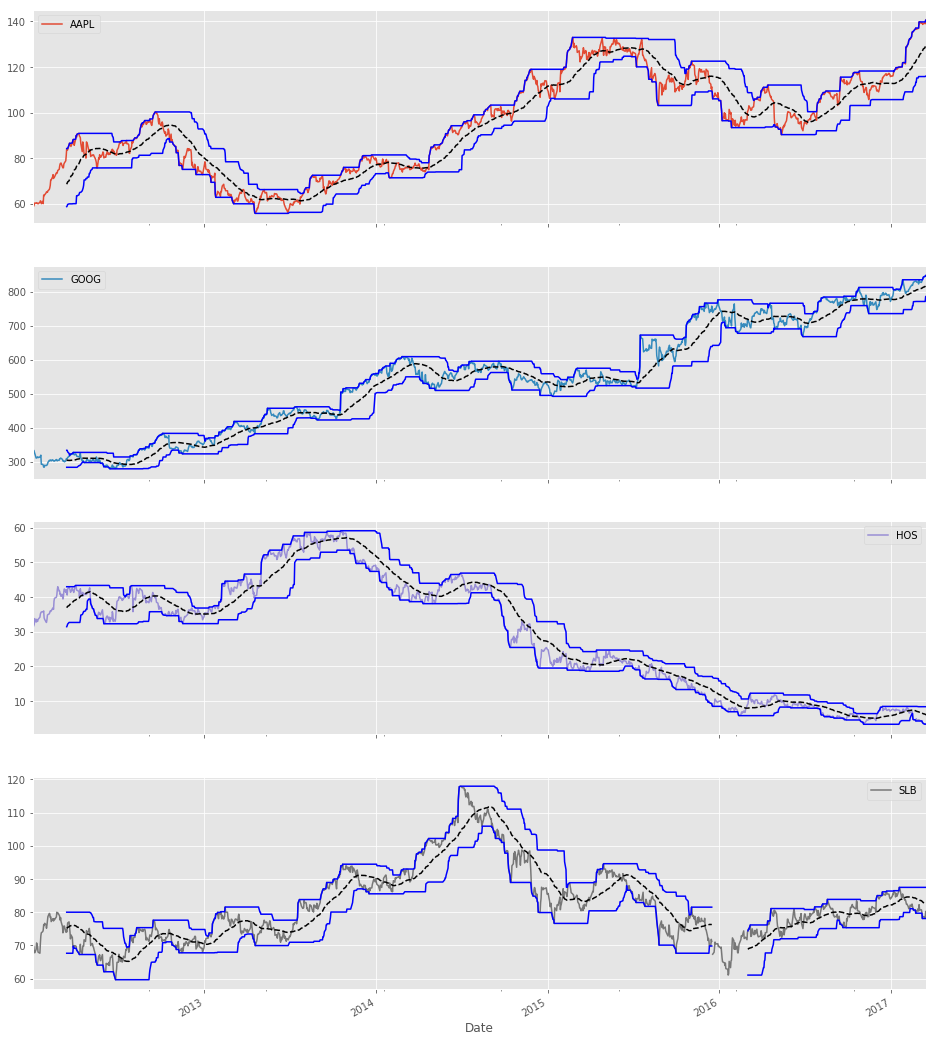

In [86]:
# plot the rolling mean, max, min with a window of 50
axs = df.plot(subplots=True, figsize=(16,20));
for i, axes in enumerate(axs):
    axes.plot(df.iloc[:, i].rolling(50).mean(), color='black', linestyle="--")
    axes.plot(df.iloc[:, i].rolling(50).max(), color='blue', linestyle="-")
    axes.plot(df.iloc[:, i].rolling(50).min(), color='blue', linestyle="-")

# Two other rolling window methods
There exists an exponentially weighted moving window, **ewm** and an expanding moving window, **expanding**. Both of these are Series and DataFrame methods that are used for a similar analysis as the one above.

# Quick Summary
* Know the difference between a date, time, and datetime
* Be able to create dates, times, and datetimes in the datetime standard library
* Extract important attributes (hour, minute, year, second) from datetime objects
* Use strftime to convert a datetime to a string using directives
* Use strptime to convert a string to a datetime also using directives
* Use timedelta to add/subtract to a datetime object
* Know the difference between datetime and datetime64
* Nanosecond vs Microsecond
* Create a Timestamp in pandas with pd.Timestamp and pd.to_datetime
* Create a date range using periods or frequency
* Slice a DatetimeIndex with []
* Shift a Series with a DatetimeIndex
* Be aware of the date offset aliases like 'W' for week and 'BM' for end of business month
* Use time series method .asfreq to sample data at regular intervals
* Use resampling to aggregate your data over regular intervals
* Use anchored offsets (mainly the days of the week) to specificy a more specific interval
* Use pandas_datareader to load financial data
* Create rolling objects with the rolling Series and DataFrame method

## Problem 1
<span  style="color:green; font-size:16px">Create a datetime object with values for both the date and time part and extract the date and time into separate variables. Can you add the date and time objects together to get the same datetime object?</span>

In [180]:
dt = datetime.datetime(2016, 4, 11,10,11,12,12321)
print("date is ", dt)

date is  2016-04-11 10:11:12.012321


In [181]:
t = dt.time()
d = dt.date()
t, d

(datetime.time(10, 11, 12, 12321), datetime.date(2016, 4, 11))

## Problem 2
<span  style="color:green; font-size:16px">Create a datetime object from today's date and add to it 6 hours 42 minutes and 123456 microseconds</span>

In [223]:
datetime.datetime.now()

datetime.datetime(2017, 3, 17, 11, 28, 19, 124132)

In [220]:
today = datetime.datetime.today()
my_timedelta = datetime.timedelta(6,42,0,123456)
print(today + my_timedelta)


2017-03-23 11:29:32.772777


## Problem 3
<span  style="color:green; font-size:16px">Write a list comprehension that contains 100 elements with each element being the current datetime (of the execution of that list comprehension iteration)</span>

In [255]:
#%%timeit
l_times = [datetime.datetime.now() for x in range(10000)]
l_times[0],l_times[9999]


(datetime.datetime(2017, 3, 17, 11, 49, 39, 879606),
 datetime.datetime(2017, 3, 17, 11, 49, 39, 888104))

## Problem 4
<span  style="color:green; font-size:16px">Put the list from problem 3 into a Series and then find the average difference between iterations. You may have to google how to find the difference between values in a Series.</span>

In [256]:
l_times = pd.Series(l_times)
l_times.diff().mean()

Timedelta('0 days 00:00:00.000000')

## Problem 5
<span  style="color:green; font-size:16px">Use the datetime library to convert "2016bbb12---15" into a date</span>

In [262]:
convert_me = "2016bbb12---15"
datetime.datetime.strptime(convert_me,"%Ybbb%m---%d")


datetime.datetime(2016, 12, 15, 0, 0)

## Problem 6
<span  style="color:green; font-size:16px">Convert the date below to "On Friday July the 8th, 2016 it was very hot. </span>

In [280]:
# your code here
d = datetime.datetime(2016, 7, 8)
datetime.datetime.strftime(d,"On %A %B the %#dth, %Y it was very hot.")


'On Friday July the 8th, 2016 it was very hot.'

## Problem 7
<span  style="color:green; font-size:16px"> Create a pandas Timestamp out of a datetime object</span>

In [285]:
pddate = pd.Timestamp(datetime.datetime(2016,12,15))
pddate

Timestamp('2016-12-15 00:00:00')

## Problem 8
<span  style="color:green; font-size:16px"> Using the datetime library, find out how many days you have been alive. Save this to the variable `days_alive`</span>

In [332]:
bd = datetime.datetime(1974,5,9)
today = datetime.datetime.today()
days_alive = (today - bd).days
type(days_alive)


days_alive = (datetime.datetime.today() - bd)
days_alive.days


15653

## Problem 9
<span  style="color:green; font-size:16px">It's possible to divide two timedelta objects together. With that information,  use pd.Timedelta to find out how many nanoseconds you have been alive for.</span>

In [333]:
pbd = pd.Timestamp(bd)
pbnow = pd.Timestamp(datetime.datetime.now())
timealive = pbnow-pbd

days_alive / pd.Timedelta(nanoseconds=1)


1.352464577299428e+18

## Problem 10
<span  style="color:green; font-size:16px">What day of the week was October 12, 1492?</span>

In [346]:
datetime.date(year = 1492,month = 10, day =12).strftime('%A')



'Wednesday'

## Problem 11
<span  style="color:green; font-size:16px">Create a range of dates using pandas that span at least a couple years without using the `start` argument and using a different frequency than `days`. What is the type of object that was created?</span>

In [364]:
# your code here
periods = 200
rng = pd.date_range(end='2018-01-19', periods=periods, freq='BM')
s = pd.Series(np.random.randn(200))
# a DatetimeIndex was created

df = pd.DataFrame(rng,s)
type(rng)



pandas.tseries.index.DatetimeIndex

## Problem 12
<span  style="color:green; font-size:16px">Investigate the DatetimeIndex object you created in problem 11. Use the dot notation along with pressing tab to view many of the methods. Explore several methods including the ones that begin with `is_...`</span>

In [352]:
rng.is_month_start

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Problem 13
<span  style="color:green; font-size:16px">Create a series with the above DatetimeIndex as the index. Fill the index with the cumulative sum of an array of random normal numpy variables. Save this series to variable `s`. It will be used for the next several problems.</span>

In [365]:

periods = 200
rng = pd.date_range(end='2018-01-19', periods=periods, freq='BM')
s = pd.Series(rng)
s

0     2001-05-31
1     2001-06-29
2     2001-07-31
3     2001-08-31
4     2001-09-28
5     2001-10-31
6     2001-11-30
7     2001-12-31
8     2002-01-31
9     2002-02-28
10    2002-03-29
11    2002-04-30
12    2002-05-31
13    2002-06-28
14    2002-07-31
15    2002-08-30
16    2002-09-30
17    2002-10-31
18    2002-11-29
19    2002-12-31
20    2003-01-31
21    2003-02-28
22    2003-03-31
23    2003-04-30
24    2003-05-30
25    2003-06-30
26    2003-07-31
27    2003-08-29
28    2003-09-30
29    2003-10-31
         ...    
170   2015-07-31
171   2015-08-31
172   2015-09-30
173   2015-10-30
174   2015-11-30
175   2015-12-31
176   2016-01-29
177   2016-02-29
178   2016-03-31
179   2016-04-29
180   2016-05-31
181   2016-06-30
182   2016-07-29
183   2016-08-31
184   2016-09-30
185   2016-10-31
186   2016-11-30
187   2016-12-30
188   2017-01-31
189   2017-02-28
190   2017-03-31
191   2017-04-28
192   2017-05-31
193   2017-06-30
194   2017-07-31
195   2017-08-31
196   2017-09-29
197   2017-10-

## Problem 14
<span  style="color:green; font-size:16px">Slice the series from problem 13 from one date to another by 4</span>

In [100]:
# your code here

## Problem 15
<span  style="color:green; font-size:16px">Use the `asfreq` method on the series above to sample using a less frequent date offset. If your offset is currently weeks, take a sample of months or two weeks.</span>

In [101]:
# your code here

## Problem 16
<span  style="color:green; font-size:16px">Do the opposite of 16. Use the method `asfreq` to sample a more frequent date offset. Remove the missing values with by utilizing the `pad` argument.</span>

In [102]:
# your code here

## Problem 17
<span  style="color:green; font-size:16px">Aggregate your data by using the resample method. Use 5 of your date offsets as the size of your group. Find the median for each group.</span>

In [103]:
# your code here

## Problem 18
<span  style="color:green; font-size:16px">Plot the aggregated data along with the original data on the same plot.</span>

In [104]:
# your code here

# Mini-Project: Predicting the Stock Market using Simple Rules
In this project we will explore making predictions on the stock market using simple rules. How simple is the rule? What if we had to choose to buy or short some stock every monday and close out our position by selling or buying on Friday based on what happened the week before. If the stock went up the week before we buy on Monday. If it went down the week before we sell.

Let's choose a stock and test this theory. After we test this theory, you will come up with your own theory based on a different rule and try and find something that works and then of course implement it in real life.

In [105]:
# first lets get some historical data from McDonalds stock
mcd = DataReader('MCD', 'google', start='2012-1-1')['Close']

In [106]:
mcd.head(10)

Date
2012-01-03     98.84
2012-01-04     99.39
2012-01-05     99.83
2012-01-06    100.60
2012-01-09     99.64
2012-01-10     99.70
2012-01-11     99.93
2012-01-12    100.57
2012-01-13    100.35
2012-01-17    100.55
Name: Close, dtype: float64

In [107]:
# take a look at raw gain/loss
mcd.resample('W-FRI').agg(lambda x: x[-1] - x[0]).head(10)

Date
2012-01-06    1.76
2012-01-13    0.71
2012-01-20    1.19
2012-01-27   -2.26
2012-02-03    1.32
2012-02-10   -0.02
2012-02-17    0.34
2012-02-24   -0.17
2012-03-02   -0.86
2012-03-09   -3.10
Freq: W-FRI, Name: Close, dtype: float64

In [108]:
# build a model for the next week
model = mcd.resample('W-FRI').agg(lambda x: 1 if x[-1] - x[0] > 0 else -1)
model.head(15)

Date
2012-01-06    1.0
2012-01-13    1.0
2012-01-20    1.0
2012-01-27   -1.0
2012-02-03    1.0
2012-02-10   -1.0
2012-02-17    1.0
2012-02-24   -1.0
2012-03-02   -1.0
2012-03-09   -1.0
2012-03-16    1.0
2012-03-23   -1.0
2012-03-30    1.0
2012-04-06    1.0
2012-04-13   -1.0
Freq: W-FRI, Name: Close, dtype: float64

In [109]:
model1 = model.tshift(1)[:-1]
model1.head(15)

Date
2012-01-13    1.0
2012-01-20    1.0
2012-01-27    1.0
2012-02-03   -1.0
2012-02-10    1.0
2012-02-17   -1.0
2012-02-24    1.0
2012-03-02   -1.0
2012-03-09   -1.0
2012-03-16   -1.0
2012-03-23    1.0
2012-03-30   -1.0
2012-04-06    1.0
2012-04-13    1.0
2012-04-20   -1.0
Freq: W-FRI, Name: Close, dtype: float64

In [110]:
actual = mcd.resample('W-FRI').agg(lambda x: (x[-1] - x[0]) / x[-1])
actual = actual[1:]
actual.head(15)

Date
2012-01-13    0.007075
2012-01-20    0.011696
2012-01-27   -0.022900
2012-02-03    0.013199
2012-02-10   -0.000201
2012-02-17    0.003400
2012-02-24   -0.001695
2012-03-02   -0.008643
2012-03-09   -0.032012
2012-03-16    0.010240
2012-03-23   -0.022815
2012-03-30    0.011519
2012-04-06    0.002636
2012-04-13   -0.019697
2012-04-20   -0.006671
Freq: W-FRI, Name: Close, dtype: float64

In [111]:
df = pd.DataFrame({'actual':actual, 'model':model1})

In [112]:
df.head()

,actual,model
Date,,
2012-01-13,0.007075,1.0
2012-01-20,0.011696,1.0
2012-01-27,-0.022900,1.0
2012-02-03,0.013199,-1.0
2012-02-10,-0.000201,1.0


In [113]:
# calculate differently for short sales
true_gain_pct = df.apply(lambda x: 1 + x['actual'] if x['model'] == 1 else 1 / (1 + x['actual']), axis=1)

In [114]:
# 20% loss!
true_gain_pct.cumprod().tail()

Date
2017-02-17    0.712761
2017-02-24    0.716140
2017-03-03    0.721235
2017-03-10    0.720954
2017-03-17    0.718875
Freq: W-FRI, dtype: float64

In [115]:
# make a function to do it all at once
def one_week_predict(stock):
    stock_close = DataReader(stock, 'google', start='2012-1-1')['Close']
    model = stock_close.resample('W-FRI').agg(lambda x: 1 if x[-1] - x[0] > 0 else -1)
    model = model.tshift(1)[:-1]
    actual = stock_close.resample('W-FRI').agg(lambda x: (x[-1] - x[0]) / x[-1])
    actual = actual[1:]
    df = pd.DataFrame({'actual':actual, 'model':model})
    true_gain_pct = df.apply(lambda x: 1 + x['actual'] if x['model'] == 1 else 1 / (1 + x['actual']), axis=1)
    return true_gain_pct

In [116]:
tgp = one_week_predict('csco')

In [117]:
tgp.cumprod().tail()

Date
2017-02-17    1.214407
2017-02-24    1.221130
2017-03-03    1.222199
2017-03-10    1.224696
2017-03-17    1.229347
Freq: W-FRI, dtype: float64

# Your turn
Create your own model with either resample or rolling to make a prediction of what will happen the next week

In [118]:
tgp.rename('Gain')

Date
2012-01-13    1.004722
2012-01-20    1.031124
2012-01-27    0.986196
2012-02-03    0.974297
2012-02-10    0.985427
2012-02-17    0.987348
2012-02-24    0.989076
2012-03-02    1.021189
2012-03-09    0.990000
2012-03-16    1.009985
2012-03-23    1.018997
2012-03-30    1.014657
2012-04-06    0.952028
2012-04-13    1.005572
2012-04-20    0.990547
2012-04-27    1.015015
2012-05-04    0.945607
2012-05-11    1.185345
2012-05-18    1.014163
2012-05-25    1.021263
2012-06-01    1.041096
2012-06-08    0.964265
2012-06-15    1.036257
2012-06-22    0.999416
2012-06-29    0.986782
2012-07-06    0.981515
2012-07-13    1.021290
2012-07-20    0.989716
2012-07-27    0.975781
2012-08-03    0.971480
                ...   
2016-08-26    0.977549
2016-09-02    1.007854
2016-09-09    0.966937
2016-09-16    1.019841
2016-09-23    0.989893
2016-09-30    1.020492
2016-10-07    0.999047
2016-10-14    1.044652
2016-10-21    1.002327
2016-10-28    0.995768
2016-11-04    0.983769
2016-11-11    0.986784
2016-1